In [31]:
import tensorflow as tf
import matplotlib
matplotlib.use('nbagg')
import matplotlib.pyplot as plt
import numpy as np

from tensorflow.keras.layers import Conv2D, Dense, InputLayer, Dropout, Flatten, Input
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import TensorBoard

### Loading the data

In [21]:
(X_train, Y_train), (X_test, Y_test) = tf.keras.datasets.fashion_mnist.load_data()

In [23]:
X_train.shape

(60000, 28, 28)

### Data shape
The input data has a shape of N X W X H but convolution expects H(height), W(width) and C(color)

In [24]:
Y_train.shape

(60000,)

In [25]:
# X_train = np.reshape(X_train, (X_train.shape + (1,)))
X_train = np.expand_dims(X_train, -1)
X_test = np.expand_dims(X_test, -1)
X_train.shape

(60000, 28, 28, 1)

In [26]:
# no of classes
K = len(set(Y_train))
K

10

### Building the model using Functional API

In [28]:
i = Input(shape=X_train[0].shape)
x = Conv2D(32, (3, 3), strides = 2, activation = 'relu')(i)
x = Conv2D(64, (3, 3), strides = 2, activation = 'relu')(x)
x = Conv2D(128, (3, 3), strides = 2, activation = 'relu')(x)
x = Flatten()(x)
x = Dense(512, activation = 'relu') (x)
x = Dense(K, activation = 'softmax') (x)
model = Model(i, x)

In [29]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 13, 13, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 6, 6, 64)          18496     
                                                                 
 conv2d_2 (Conv2D)           (None, 2, 2, 128)         73856     
                                                                 
 flatten (Flatten)           (None, 512)               0         
                                                                 
 dense (Dense)               (None, 512)               262656    
                                                                 
 dense_1 (Dense)             (None, 10)                5130  

### Compiling the model

In [30]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

### Training the model

In [33]:
logdir = 'logs'
tensorboard_callback = TensorBoard(log_dir = logdir)

In [34]:
hist = model.fit(X_train, Y_train, 
                 validation_data=(X_test, Y_test), 
                 epochs=15, 
                 callbacks=[tensorboard_callback])

Epoch 1/15
1875/1875 [==============================] - 21s 5ms/step - loss: 0.5198 - accuracy: 0.8213 - val_loss: 0.4042 - val_accuracy: 0.8477
Epoch 2/15
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3653 - accuracy: 0.8640 - val_loss: 0.3870 - val_accuracy: 0.8545
Epoch 3/15
1875/1875 [==============================] - 8s 5ms/step - loss: 0.3246 - accuracy: 0.8776 - val_loss: 0.3796 - val_accuracy: 0.8638
Epoch 4/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2917 - accuracy: 0.8902 - val_loss: 0.3643 - val_accuracy: 0.8715
Epoch 5/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2686 - accuracy: 0.8976 - val_loss: 0.3575 - val_accuracy: 0.8755
Epoch 6/15
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2508 - accuracy: 0.9054 - val_loss: 0.3865 - val_accuracy: 0.8675
Epoch 7/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2305 - accuracy: 0.9115 - val_loss: 0.4284 - val_accuracy

<IPython.core.display.Javascript object>


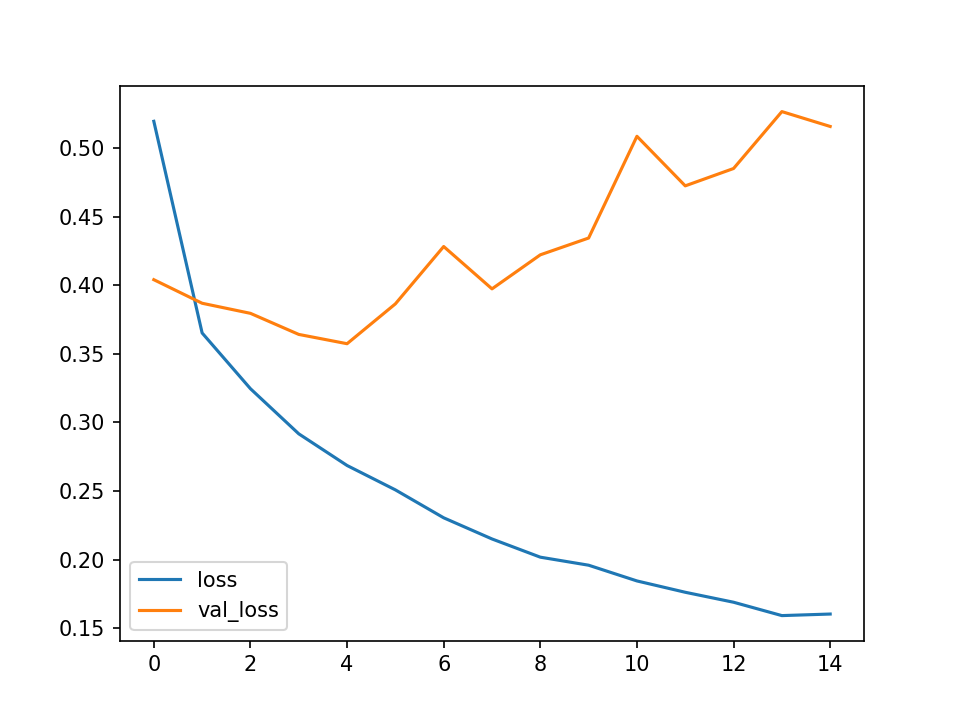

<IPython.core.display.Javascript object>


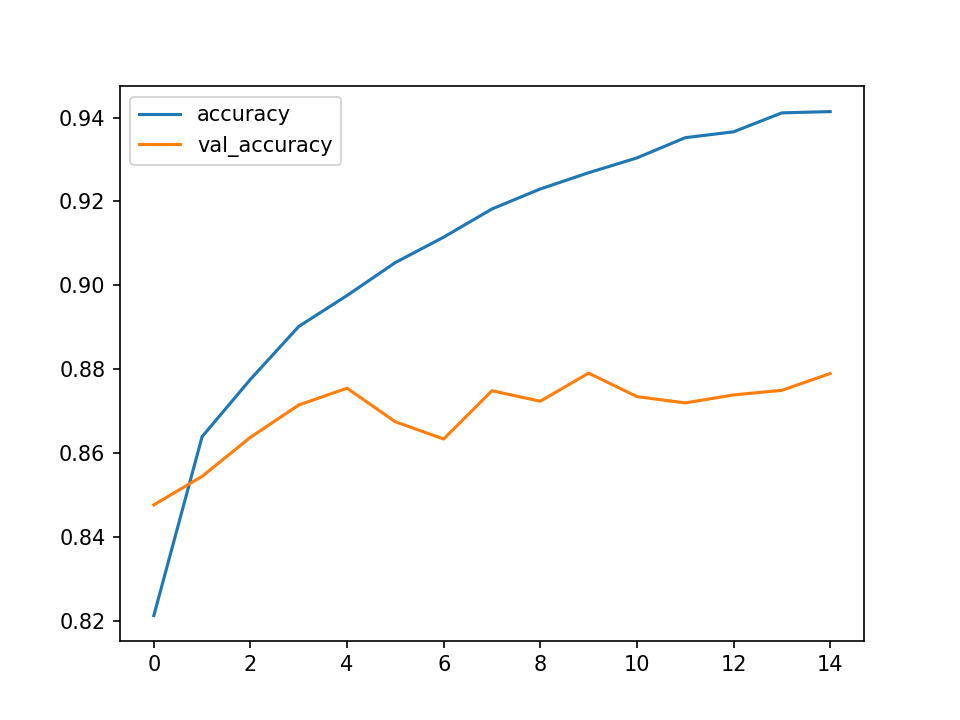

In [36]:
plt.plot(hist.history['loss'], label = 'loss')
plt.plot(hist.history['val_loss'], label = 'val_loss')
plt.legend()
plt.show()

plt.figure()
plt.plot(hist.history['accuracy'], label = 'accuracy')
plt.plot(hist.history['val_accuracy'], label = 'val_accuracy')
plt.legend()
plt.show()

In [35]:
from sklearn.metrics import confusion_matrix
import itertools

In [37]:
def plot_confusion_matrix(cm, classes, normalize = False, title='Confusion matrix', cmap = plt.cm.Blues) :
    """
    This function prints and plots the confusion matrix
    """
    if normalize :
        cm = cm.astype('float') / cm.sum(axis = 1)[:, np.newaxis]
        print('Normalized Confusion matrix')
    else:
        print(cm)
        
    plt.imshow(cm, interpolation='nearest', cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2
    
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])) :
        plt.text(j, i, format(cm[i, j], fmt),
                horizontalalignment = 'center',
                color = 'white' if cm[i, j] > thresh else 'black')
    plt.tight_layout()
    plt.ylabel('True Label')
    plt.xlabel('Predicted label')
    plt.show()

313/313 [==============================] - 1s 2ms/step
[[817   2  21  17   5   2 130   0   6   0]
 [  1 974   2  16   3   0   4   0   0   0]
 [ 20   0 794  11  94   0  79   0   2   0]
 [ 20   6  13 893  41   0  26   0   1   0]
 [  3   1  69  24 842   0  61   0   0   0]
 [  1   0   0   1   0 956   0  25   0  17]
 [121   1  80  28 125   0 639   0   6   0]
 [  0   0   0   0   1  15   0 946   0  38]
 [  5   1   4   6   9   4   5   1 963   2]
 [  0   0   0   0   0   5   1  28   0 966]]


<IPython.core.display.Javascript object>


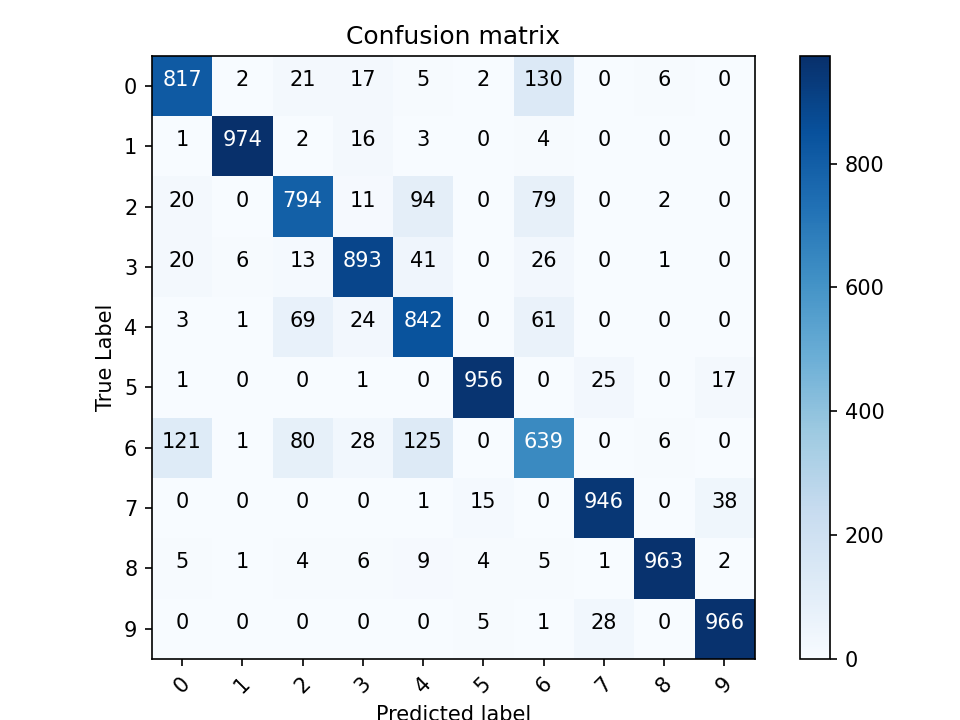

In [43]:
P_test = model.predict(X_test).argmax(axis = 1)
cm = confusion_matrix(Y_test, P_test)
plot_confusion_matrix(cm, list(range(K)), normalize=False)

<IPython.core.display.Javascript object>


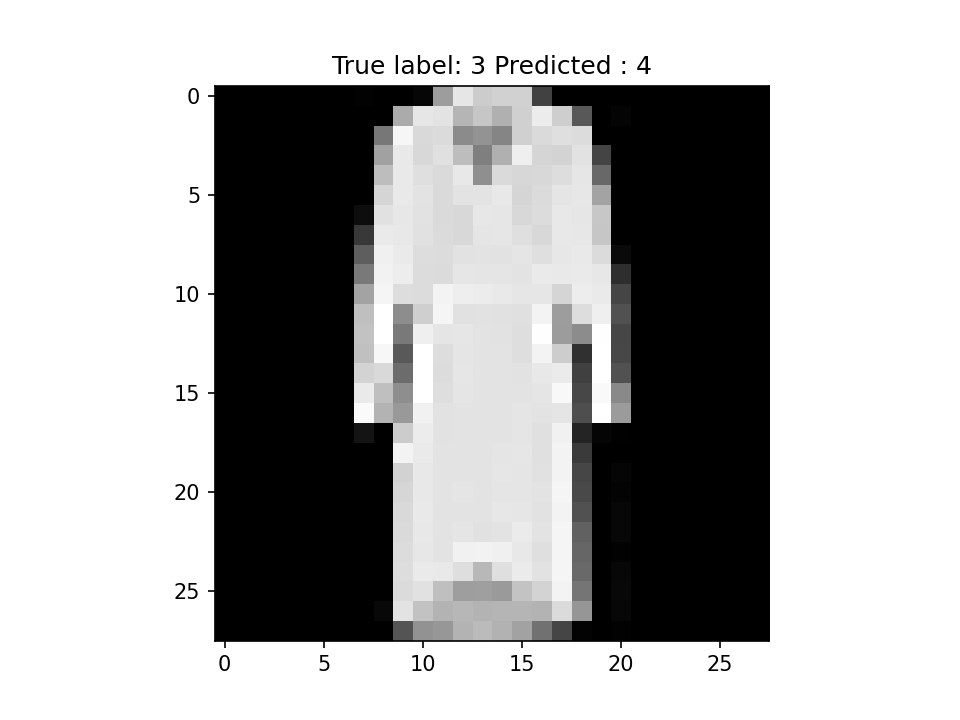

In [48]:
misclassified_idx = np.where(P_test != Y_test)[0]
i = np.random.choice(misclassified_idx)
plt.figure()
plt.imshow(X_test[i], cmap = 'gray')
plt.title('True label: %s Predicted : %s' % (Y_test[i], P_test[i]))
plt.show()